1, 2 и 3 задания доделываю. Остальные готовы

## Тема “Классификация текста”

#### В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

## Задание 1.
Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].


In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition, ensemble
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pandas, xgboost, numpy, textblob, string
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
combine_df = pd.read_pickle('tweet_preprocessed.pkl')

combine_df.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[when, father, is, dysfunct, and, is, so, self...","[when, father, is, dysfunctional, and, is, so,..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, for, lyft, credit, can, not, use, caus...","[thanks, for, lyft, credit, can, not, use, cau..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, your, majesti]","[bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, with, yoyou, all, t..."
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, now, motiv]","[factsguide, society, now, motivation]"


In [3]:
# После строки 31962, значения столбца label пустые. Может здесь лучше было бы попробовать
# предугадать значения этих полей. Так как я не успеваю, решил удалить эти значения и уменьшить 
# параметры разбиения на train и test
combine_df = combine_df.dropna()


In [4]:
combine_df['tweet_stemmed'] = combine_df.tweet_stemmed.apply(lambda x: ' '.join(x))
combine_df['tweet_lemmatized'] = combine_df.tweet_lemmatized.apply(lambda x: ' '.join(x))

In [5]:
combine_df.head(2)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",when father is dysfunct and is so selfish he d...,when father is dysfunctional and is so selfish...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...",thank for lyft credit can not use caus they do...,thanks for lyft credit can not use cause they ...


In [6]:
size = 25550

In [7]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(combine_df['tweet_stemmed'], \
                   combine_df['label'], train_size=size, random_state=13, stratify=combine_df['label'])

In [8]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(combine_df['tweet_lemmatized'], \
                   combine_df['label'], train_size=size, random_state=13, stratify=combine_df['label'])

In [9]:
X_train_st.shape, len(y_train_st), X_test_st.shape, len(y_test_st)

((25550,), 25550, (6412,), 6412)

In [10]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    return f1_score(y_test, preds[:,1]>0.3)

In [11]:
combine_df = combine_df.dropna()
combine_df.label = combine_df.label.astype(int)

combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 0 to 31961
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    31962 non-null  int64 
 1   label                 31962 non-null  int64 
 2   tweet                 31962 non-null  object
 3   clean_tweet           31962 non-null  object
 4   tweet_token           31962 non-null  object
 5   tweet_token_filtered  31962 non-null  object
 6   tweet_stemmed         31962 non-null  object
 7   tweet_lemmatized      31962 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.2+ MB


In [12]:
count_vect = CountVectorizer(stop_words='english', max_features=15000)
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=15000)
clf = LogisticRegression()

In [13]:
def f1_score_ (text, model, xtrain, ytrain, xtest, ytest):
  score = train_model(clf, xtrain, ytrain, xtest, ytest)
  print(text, '=', score)

## Задание 2.
Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].


## Задание 3.
Выведите результаты f1-score всех моделей, сделайте вывод.


In [14]:
f1_score_('Stemmed count vectorizer f1 score', clf, count_vect.fit_transform(X_train_st), \
          y_train_st, count_vect.transform(X_test_st), y_test_st)

Stemmed count vectorizer f1 score = 0.6715506715506716


In [15]:
f1_score_('Lemmatized tfidf vectorizer f1 score', clf, count_vect.fit_transform(X_train_lem), \
          y_train_lem, count_vect.transform(X_test_lem), y_test_lem)

Lemmatized tfidf vectorizer f1 score = 0.6683046683046684


In [16]:
f1_score_('Stemmed tfidf vectorizer f1 score', clf, tfidf_vect.fit_transform(X_train_st), \
          y_train_st, tfidf_vect.transform(X_test_st), y_test_st)

Stemmed tfidf vectorizer f1 score = 0.6172506738544474


In [17]:
f1_score_('Lemmatized tfidf vectorizer f1 score', clf, tfidf_vect.fit_transform(X_train_lem), \
          y_train_lem, tfidf_vect.transform(X_test_lem), y_test_lem)

Lemmatized tfidf vectorizer f1 score = 0.6233062330623306


### Лучший результат на stemmed используя count vectorizer

## Задание 4.
Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова


In [18]:
import collections
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


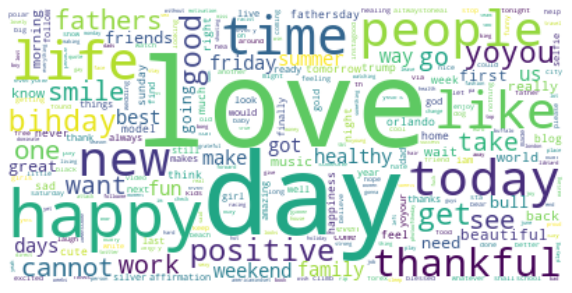

In [19]:

words = []
for line in combine_df['clean_tweet']:
  # line_words = line.split()
  line_words = [word for word in line.split() if word not in stopwords_set]
  words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Задание 5.
Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0).


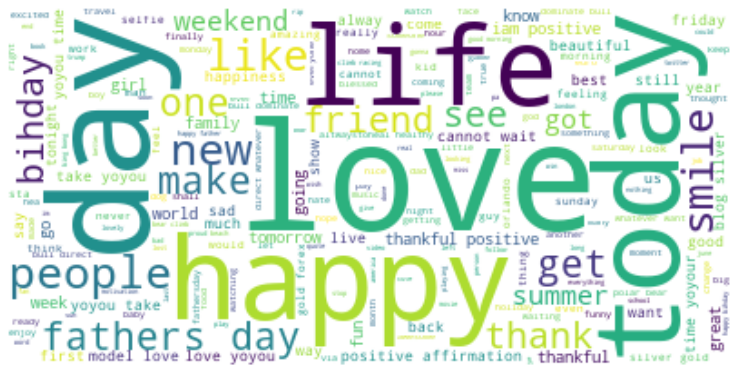

In [20]:
pos_words = []
for line in combine_df['clean_tweet'][combine_df['label'] == 0]: 
    line_words = [word for word in line.split() if word not in stopwords_set]
    pos_words.extend(line_words)
pos_words = ' '.join(pos_words)

stopwords_set = set(stopwords.words('english'))
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=50000,
    stopwords = stopwords_set
   ).generate(pos_words)
plt.figure(figsize=(13,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Задание 6.
Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 


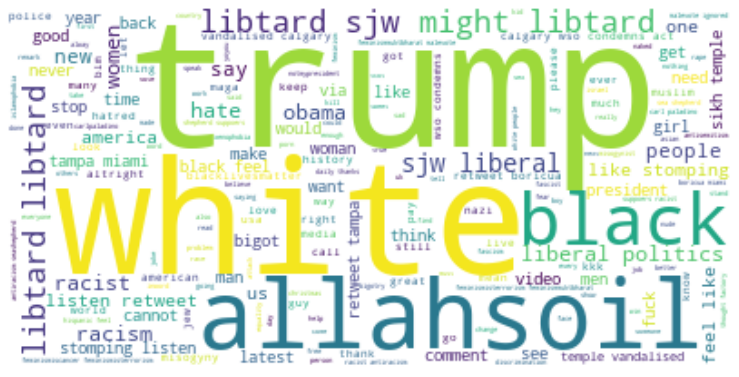

In [21]:
pos_words = []
for line in combine_df['clean_tweet'][combine_df['label'] == 1]: 
    line_words = [word for word in line.split() if word not in stopwords_set]
    pos_words.extend(line_words)
pos_words = ' '.join(pos_words)

stopwords_set = set(stopwords.words('english'))
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=50000,
    stopwords = stopwords_set
   ).generate(pos_words)
plt.figure(figsize=(13,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()